### Buissiness Problem

#### a. bulit a good model to predict what is the chance a applier will not default a loan
#### b. who is the good custmer and built questions to qulify the appliers.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [2]:
df=pd.read_csv('LoansTrainingSet.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,Fully Paid,10208,Short Term,716.0,10+ years,Rent,41853.0,Business Loan,$561.52,13.2,NaN,4,1,2289,4671,1.0,0.0
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,Short Term,NaN,5 years,Rent,NaN,Debt Consolidation,$386.36,17.7,NaN,7,0,11970,16579,0.0,0.0
9,0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,Fully Paid,2036,Short Term,733.0,NaN,Home Mortgage,55985.0,Debt Consolidation,$741.79,19.8,29.0,7,0,10926,15676,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

### Outline of Cleaning Steps:
#### correct data type for 'Monthly Debt' and 'Maximum Open Credit'
#### clean outlier values of credit score by dividing by 10
#### Convert the 9999999 values of 'Current Loan Amount' to NaN 
#### Home Ownership: Have mortgage and home mortgage can be combined
#### Purpose : other and Other can be combined into one category
#### Get rid of repeated records in Loan ID

In [5]:
#1. correct data type for 'Monthly debt' and 'Max open credit'
#use more SQL

In [6]:
def remove_coma(string):
    string= string[1:].replace(',','')
    return string

In [7]:
df['Monthly Debt']=df['Monthly Debt'].apply(remove_coma)

In [8]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,1106.04,26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [9]:
df['Monthly Debt'] = df['Monthly Debt'].astype('float')

In [10]:
df['Maximum Open Credit'].head(10)

0    16056
1    19149
2    28335
3    43915
4    37081
5     4671
6    16954
7    16954
8    16579
9    15676
Name: Maximum Open Credit, dtype: object

In [11]:
#df['Maximum Open Credit']=df['Maximum Open Credit'].astype('float')

In [12]:
df['Maximum Open Credit'].isnull().value_counts()

False    256984
Name: Maximum Open Credit, dtype: int64

In [13]:
df['Maximum Open Credit'].astype('str').str.isnumeric().value_counts()

True     256980
False         4
Name: Maximum Open Credit, dtype: int64

In [14]:
df['Maximum Open Credit'][~df['Maximum Open Credit'].astype('str').str.isnumeric()]

184662    #VALUE!
184663    #VALUE!
187512    #VALUE!
187513    #VALUE!
Name: Maximum Open Credit, dtype: object

In [15]:
df['Maximum Open Credit'][~df['Maximum Open Credit'].astype('str').str.isnumeric()] = np.nan

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df['Maximum Open Credit']=df['Maximum Open Credit'].astype('float')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null float64
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum 

In [18]:
#Clean outlier values of credit score by dividing by 10

In [19]:
df.loc[df['Credit Score']>1000,'Credit Score'] = df.loc[df['Credit Score']>1000,'Credit Score']/10

In [20]:
df[df['Credit Score']>1000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [21]:
#Convert the very high values of 'Current Loan Amount' to NaN (since '9999999' is being used as a code for NaN)

In [22]:
df.loc[df['Current Loan Amount']>2.436700e+05,'Current Loan Amount']=np.NaN

In [23]:
#Home Ownership: Have mortgage and home mortgage can be combined


In [24]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [25]:
df.loc[df['Home Ownership']=='Home Mortgage','Home Ownership'] = 'HaveMortgage'

In [26]:
df['Home Ownership'].unique()

array(['HaveMortgage', 'Own Home', 'Rent'], dtype=object)

In [27]:
#Purpose : other and Other can be combined into one category


In [28]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [29]:
df.loc[df['Purpose']=='other','Purpose'] = 'Other'

In [30]:
df['Purpose'].unique()

array(['Debt Consolidation', 'Other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Buy a Car', 'Medical Bills',
       'Take a Trip', 'Educational Expenses'], dtype=object)

In [31]:
#Get ridof repeated records in Loan ID

In [32]:
Loanid_count=df['Loan ID'].value_counts()

In [33]:
type(Loanid_count)

pandas.core.series.Series

In [34]:
Loanid_count.head(5)

7f71f657-b455-4276-85c6-5a9d7682c16f    4
473e6f1b-1c3c-458d-896c-ee6296f0f534    4
a41e8325-d672-4dda-a4c6-19c1de25fe5b    4
30f14f05-d679-4f80-9248-e7f1d290054b    4
f250729d-44ed-4030-af78-8bd3fb26d2a5    4
Name: Loan ID, dtype: int64

In [35]:
repeat_ID = Loanid_count[Loanid_count>1].index

In [36]:
repeat_ID[:5]

Index(['7f71f657-b455-4276-85c6-5a9d7682c16f',
       '473e6f1b-1c3c-458d-896c-ee6296f0f534',
       'a41e8325-d672-4dda-a4c6-19c1de25fe5b',
       '30f14f05-d679-4f80-9248-e7f1d290054b',
       'f250729d-44ed-4030-af78-8bd3fb26d2a5'],
      dtype='object')

In [37]:
unique_ID = Loanid_count[Loanid_count==1].index

In [38]:
repeat_records = df[df['Loan ID'].isin(repeat_ID)]
unique_records = df[df['Loan ID'].isin(unique_ID)]

In [39]:
repeat_records.shape

(80464, 19)

In [40]:
x = [1,2,3,3,4,4,5,5,6,6]
max(set(x),key=x.count)

3

In [41]:
unique_records.shape

(176520, 19)

In [42]:
#from statistics import mode

In [43]:
#def merge_repeated_records(group):
#    combined_record={}
#    for col in group.columns:
#        if (group[col].dtype=='float64'):
#            combined_record[col] = group[col].dropna().median()
#        elif (group[col].dtype=='int64'):
#            l = group[col].values.tolist()
#            combined_record[col] = int(max(set(l),key=l.count))
#        else:
#            l = group[col].values.tolist()
#            combined_record[col] = max(set(l),key=l.count)
#    return combined_record

In [44]:
def group_repeat_records(datafr):
    group_record={}
    for col in datafr.columns:
        if datafr[col].dtype=='float64':
            group_record[col]=datafr[col].dropna().mean()
        else:
            x=datafr[col].tolist()
            group_record[col]=max(set(x),key=x.count)
            
    return group_record

In [45]:
reunique_records = pd.DataFrame(repeat_records.groupby('Loan ID').apply(group_repeat_records).values.tolist())


In [46]:
reunique_records.head()

,Annual Income,Bankruptcies,Credit Score,Current Credit Balance,Current Loan Amount,Customer ID,Home Ownership,Loan ID,Loan Status,Maximum Open Credit,Monthly Debt,Months since last delinquent,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History
0,49225.000000,0.0,664.0,14123,24613.0,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Rent,0000afa6-8902-4f8f-b870-25a8fdad0aeb,Charged Off,16954.0,542.290,73.0,0,7,Business Loan,0.0,Long Term,6 years,17.6
1,53072.666667,0.0,701.0,6817,17970.5,afbc2fa3-3bad-4d48-b691-829aed78bad5,Own Home,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,Charged Off,22787.5,597.175,43.0,0,7,Debt Consolidation,0.0,Short Term,< 1 year,9.9
2,35315.000000,0.0,729.0,17092,11604.0,28eb75ac-6a09-4057-b73f-726c72ebf933,HaveMortgage,00035328-2636-4390-8322-5841de482d2b,Charged Off,20743.0,662.160,NaN,0,12,Debt Consolidation,0.0,Short Term,6 years,15.0
3,40308.000000,0.0,734.0,28513,16929.0,727bb429-dfa1-41c4-a347-23230e23949f,HaveMortgage,00038a08-f058-4add-a8ed-497b91672a9e,Charged Off,101110.0,745.700,NaN,0,10,Debt Consolidation,0.0,Long Term,3 years,14.9
4,70690.000000,0.0,740.0,43375,14727.0,c1a7ba66-9f36-4f5c-86cd-1aa7ad68b954,HaveMortgage,0006572c-9567-484d-b49b-bfe06536aa96,Charged Off,225911.0,1083.910,27.0,0,12,Debt Consolidation,0.0,Short Term,3 years,18.0


In [47]:
reunique_records['Loan ID'].nunique()

39180

In [48]:
cleaned_df1 = pd.concat([reunique_records,unique_records],ignore_index=True)[df.columns]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [49]:
cleaned_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Loan Status                     215700 non-null object
Current Loan Amount             180490 non-null float64
Term                            215700 non-null object
Credit Score                    171202 non-null float64
Years in current job            206710 non-null object
Home Ownership                  215700 non-null object
Annual Income                   171202 non-null float64
Purpose                         215700 non-null object
Monthly Debt                    215700 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null int64
Number of Credit Problems       215700 non-null int64
Current Credit Balance          215700 non-null int64
Maximum

## Imputation of missing values for the whole data set

### Outline 

#### filling missing values for 'Tax Liens'
#### filling missing values for 'Bankruptcies'
#### filling missing values for 'Maximum Open Credit'
#### filling missing values for 'Credit Score'
#### filling missing values for 'Annual Income'
#### filling missing values for 'Current Loan Amount'
#### filling missing values for 'Years in current job'

In [50]:
df1=cleaned_df1

In [51]:
#fill in missing values for Tax liens

In [52]:
df1['Tax Liens'].describe()

count    215678.000000
mean          0.026331
std           0.240853
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: Tax Liens, dtype: float64

In [53]:
df1['Tax Liens'].value_counts()

0.0     211881
1.0       2701
2.0        707
3.0        195
4.0         97
5.0         48
6.0         26
8.0          7
7.0          6
9.0          5
10.0         3
11.0         2
Name: Tax Liens, dtype: int64

In [54]:
df1['Tax Liens']=df1['Tax Liens'].fillna(0)

In [55]:
#fill in missing values for bankruptcies

In [56]:
df1['Bankruptcies'].value_counts()

0.0    192727
1.0     21506
2.0       818
3.0       155
4.0        25
5.0        13
6.0         3
7.0         1
Name: Bankruptcies, dtype: int64

In [57]:
df1['Bankruptcies']=df1['Bankruptcies'].fillna(0)

In [58]:
#filling missing values for Maximum Open Credit

In [59]:
df1['Maximum Open Credit'].describe()

count    2.156980e+05
mean     3.698381e+04
std      6.011805e+05
min      0.000000e+00
25%      1.296125e+04
50%      2.206000e+04
75%      3.681000e+04
max      1.763322e+08
Name: Maximum Open Credit, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Log-Transformed Distribution')

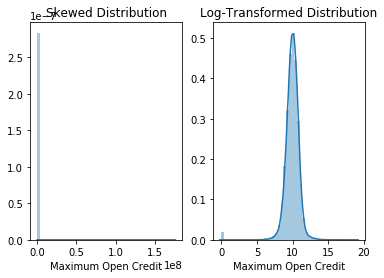

In [60]:
f, axarr = plt.subplots(1,2)
sns.distplot(df1['Maximum Open Credit'].dropna(),ax=axarr[0])
axarr[0].set_title('Skewed Distribution')
sns.distplot(np.log(1+df1['Maximum Open Credit'].dropna()),ax=axarr[1])
axarr[1].set_title('Log-Transformed Distribution')

In [61]:
df1['Maximum Open Credit']=df1['Maximum Open Credit'].fillna(np.exp(np.log(1+df1['Maximum Open Credit']).mean()))

In [62]:
df1.loc[df1['Credit Score']>1000, 'Credit Score']=df1.loc[df1['Credit Score']>1000, 'Credit Score']/10

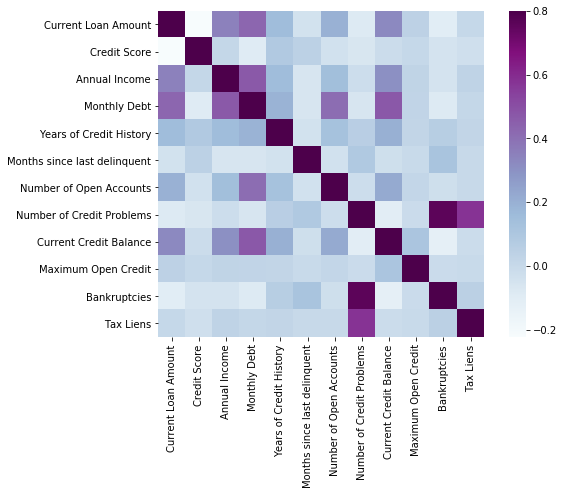

In [63]:
matrix = df1.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
LR = LinearRegression()
x_train=df1.loc[df1['Credit Score'].notnull(),['Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit']]
y_train=df1.loc[df1['Credit Score'].notnull(),'Credit Score']
x_test=df1.loc[df1['Credit Score'].isnull(),['Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit']]


In [ ]:
LR=LR.fit(x_train,y_train)

In [67]:
#replace = LR.predict(x_test)

In [70]:
#df1.loc[df1['Credit Score'].isnull(),'Credit Score'] = replace

ValueError: Must have equal len keys and value when setting with an iterable

In [74]:
df1['Credit Score'].isnull().value_counts()

False    215700
Name: Credit Score, dtype: int64

In [68]:
len(LR.predict(x_test))

44498

In [76]:
x_test.shape

(44498, 6)

In [83]:
l=LR.predict(x_test)

In [78]:
b= ['NaN']*44498
len(b)

44498

In [80]:
l = l.tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [95]:
l = pd.Series(l)

0        724.929891
1        721.924926
2        721.186973
3        720.723382
4        722.248312
5        718.901889
6        729.591506
7        727.192253
8        722.959882
9        718.777476
10       724.517900
11       717.170233
12       728.415704
13       723.949954
14       723.935165
15       724.948553
16       719.767677
17       723.049940
18       723.974402
19       718.941350
20       722.752999
21       725.199778
22       721.829607
23       723.925963
24       723.577328
25       720.923620
26       718.809312
27       721.016984
28       730.004252
29       722.119366
            ...    
44468    725.223170
44469    729.447715
44470    724.278811
44471    720.776480
44472    735.409968
44473    720.181459
44474    725.223073
44475    724.643347
44476    723.535965
44477    720.748368
44478    726.129003
44479    722.670198
44480    724.571481
44481    727.340599
44482    720.635873
44483    721.395957
44484    722.704430
44485    726.812622
44486    714.582519


In [96]:
df1[['Credit Score']]

,Credit Score
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None


In [91]:
df1['Credit Score'] = df1[['Credit Score']].replace(df1.loc[df1['Credit Score'].isnull(),'Credit Score'],l,inplace=True)

In [93]:
len(df1.loc[df1['Credit Score'].notnull(),'Credit Score'])

0

In [316]:
df3=df1.loc[df1['Credit Score'].isnull(),['Credit Score']]

In [317]:
index = df3.index
type(index)
index

Int64Index([    19,     22,     61,     71,    106,    133,    136,    150,
               182,    190,
            ...
            215644, 215651, 215652, 215654, 215665, 215668, 215673, 215689,
            215692, 215697],
           dtype='int64', length=44498)

In [318]:
for (index,l) in zip(index,l):
    df1.loc[index,['Credit Score']] =l

In [242]:
#df1['Credit Score'].fillna(l.to_dict(),inplace=True)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Loan Status                     215700 non-null object
Current Loan Amount             180490 non-null float64
Term                            215700 non-null object
Credit Score                    215700 non-null float64
Years in current job            206710 non-null object
Home Ownership                  215700 non-null object
Annual Income                   171202 non-null float64
Purpose                         215700 non-null object
Monthly Debt                    215700 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null int64
Number of Credit Problems       215700 non-null int64
Current Credit Balance          215700 non-null int64
Maximum

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613.0,Long Term,664.0,6 years,Rent,49225.000000,Business Loan,542.290,17.6,73.0,7,0,14123,16954.0,0.0,0.0
1,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17970.5,Short Term,701.0,< 1 year,Own Home,53072.666667,Debt Consolidation,597.175,9.9,43.0,7,0,6817,22787.5,0.0,0.0
2,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,Charged Off,11604.0,Short Term,729.0,6 years,HaveMortgage,35315.000000,Debt Consolidation,662.160,15.0,NaN,12,0,17092,20743.0,0.0,0.0
3,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929.0,Long Term,734.0,3 years,HaveMortgage,40308.000000,Debt Consolidation,745.700,14.9,NaN,10,0,28513,101110.0,0.0,0.0
4,0006572c-9567-484d-b49b-bfe06536aa96,c1a7ba66-9f36-4f5c-86cd-1aa7ad68b954,Charged Off,14727.0,Short Term,740.0,3 years,HaveMortgage,70690.000000,Debt Consolidation,1083.910,18.0,27.0,12,0,43375,225911.0,0.0,0.0


filling missing values for 'Annual Income'

In [ ]:
Income_dict=df1.groupby(['Home Ownership'])['Annual Income'].median().to_dict()
Income_dict

In [ ]:
df1.loc[df1['Annual Income'].isnull(),'Annual Income']=df1.loc[df1['Annual Income'].isnull(),'Home Ownership'].map(Income_dict)

In [ ]:
#df1[df1['Home Ownership']=='HaveMortgage'][df1['Annual Income'].isnull()]['Annual Income']=0
#df1[df1['Home Ownership']=='Own Home'][df1['Annual Income'].isnull()]['Annual Income']=0
#df1[df1['Home Ownership']=='Rent'][df1['Annual Income'].isnull()]['Annual Income']=0


In [ ]:
#x1_train=df1.loc[df1['Annual Income'].notnull(),['Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit']]
#y1_train=df1.loc[df1['Annual Income'].notnull(),'Annual Income']
#x1_test=df1.loc[df1['Annual Income'].isnull(),['Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit']]
#

In [ ]:
#df1[df1['Home Ownership']=='HaveMortgage']['Annual Income'].fillna(71736.0,inplace=True)
#df1[df1['Home Ownership']=='Own Home']['Annual Income'].fillna(54566.0,inplace=True)
#df1[df1['Home Ownership']=='Rent']['Annual Income'].fillna(53630.5,inplace=True)

In [ ]:
#df1['Annual Income'].fillna(71736.0,inplace=True)

In [ ]:
df1.info()

filling missing values for 'Current Loan Amount'

In [ ]:
Loan_dict=df1.groupby(['Term'])['Current Loan Amount'].median().to_dict()
Loan_dict

In [ ]:
df1.loc[df1['Current Loan Amount'].isnull(),'Current Loan Amount']=df1.loc[df1['Current Loan Amount'].isnull(),'Term'].map(Loan_dict)

In [ ]:
df1.info()

filling missing values for 'Years in current job'

In [ ]:
df1['Years in current job'].head(10)

In [ ]:
df1.loc[df1['Years in current job']=='< 1 year','Years in current job']='0.5 years'

In [ ]:
df1.loc[df1['Years in current job']=='10+ years','Years in current job']='10 years'

In [ ]:
df1['Years in current job'].head(10)

In [ ]:
def year_transform(string):
    return string.split(' ')[0]

In [ ]:
df1['Years in current job']=df1['Years in current job'].astype(str).apply(year_transform)

In [ ]:
df1['Years in current job'].head(10)

In [ ]:
df1['Years in current job']=df1['Years in current job'].astype('float64')

In [ ]:
Yearsinjob_dict=df1.groupby(['Home Ownership'])['Years in current job'].median().to_dict()
Yearsinjob_dict

In [ ]:
df1.loc[df1['Years in current job'].isnull(),'Years in current job']=df1.loc[df1['Years in current job'].isnull(),'Home Ownership'].map(Yearsinjob_dict)

In [ ]:
df1.info()

In [ ]:
df1.head()

#### deskew for columns with very huge values

In [ ]:
plt.figure(figsize=(25,25))
plt.subplot(231)
sns.distplot(df1['Monthly Debt']) 
plt.subplot(332)
sns.distplot(df1['Current Loan Amount']) 
plt.subplot(233)
sns.distplot(df1['Annual Income']) 
plt.subplot(234)
sns.distplot(df1['Current Credit Balance']) 
plt.subplot(235)
sns.distplot(df1['Maximum Open Credit']) 
plt.subplot(236)
sns.distplot(df1['Credit Score']) 

It can be inferred that the distributions of all of these datas are skewed, which means they are not normally distributed. Let us make it normal by take a log on them. So that the algorithms work beeter.

In [ ]:
df1['Monthly Debt']=np.log(df1['Monthly Debt']+1)
df1['Current Loan Amount']=np.log(df1['Current Loan Amount']+1)
df1['Annual Income']=np.log(df1['Annual Income']+1)
df1['Current Credit Balance']=np.log(df1['Current Credit Balance']+1)
df1['Maximum Open Credit']=np.log(df1['Maximum Open Credit']+1)
df1['Credit Score']=np.log(df1['Credit Score']+1)

In [ ]:
plt.figure(figsize=(25,25))
plt.subplot(231)
sns.distplot(df1['Monthly Debt']) 
plt.subplot(332)
sns.distplot(df1['Current Loan Amount']) 
plt.subplot(233)
sns.distplot(df1['Annual Income']) 
plt.subplot(234)
sns.distplot(df1['Current Credit Balance']) 
plt.subplot(235)
sns.distplot(df1['Maximum Open Credit']) 
plt.subplot(236)
sns.distplot(df1['Credit Score']) 

In [ ]:
df1.head()

In [ ]:
target_dict={'Charged Off':0,'Fully Paid':1}

In [ ]:
df1['Loan Status']=df1['Loan Status'].map(target_dict)

In [ ]:
#df1=pd.get_dummies(df1,drop_first=True)

In [ ]:
df1=df1.drop('Months since last delinquent',axis=1)

In [ ]:
cleaned_data = df1.to_csv('cleaned_data.csv',index=False)

In [ ]:
df1.info()